# Jasmine's 2025 Boba Tracker

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
import calplot

In [31]:
boba_raw = pd.read_csv('data/boba2025.csv')

In [32]:
boba_raw

,month,day,store,drink,toppings,drink name,friends,cost,size,rating
0,january,1,cafe bakery & restaurant,hong kong milk tea,NaN,NaN,"sophia, mom, dad, waipo",$4.75,16oz,8/10
1,january,2,1011 sip tea,lychee black milk tea,boba,NaN,"sophia, waipo",$5.50,16oz,7/10
2,january,3,mr sun tea,earl grey milk tea,"boba, pudding, grass jelly",three brothers milk tea,emily,$4.00,22oz,8.5/10
3,january,5,mandro teahouse,jasmine green milk tea,pudding,NaN,"emily, jas",$5.00,22oz,8.5/10
4,january,7,teaspoon,jasmine green milk tea,boba,creamy jasmine,jeff,$6.75,22oz,9/10
...,...,...,...,...,...,...,...,...,...,...
343,december,26,heytea,salted cheese black milk tea,"tiramisu cloud, cocoa powder",tiramisu milk tea,jeff,$7.99,16oz,9.5/10
344,december,30,harucake,banana matcha latte,"banana cream top, banana chip",banana matcha cloud,lloyd,$9.50,16oz,10/10
345,december,30,harucake,corn hojicha latte,"corn cream top, corn ice cream",soo soo hojicha,lloyd,$8.75,16oz,10/10
346,december,30,stagger,matcha latte,matcha cream top,double matcha,lloyd,$7.50,12oz,8.5/10


In [33]:
boba = boba_raw.copy()

In [34]:
def get_toppings(toppings):
    if pd.isnull(toppings):
        return ['no topping']
    toppings = toppings.strip()
    return toppings.split(', ')

def get_friends(friends):
    if pd.isnull(friends):
        return ['by myself']
    friends = friends.strip()
    return friends.split(', ')

def get_category(drink):
    if 'milk tea' in drink:
        return 'milk tea'
    elif 'matcha' in drink:
        return 'matcha'
    elif 'hojicha' in drink:
        return 'hojicha'
    elif 'milk' in drink:
        return 'milk'
    elif 'tea' in drink:
        return 'tea'
    elif 'smoothie' in drink or 'slush' in drink or 'blended' in drink:
        return 'blended'
    elif 'latte' in drink:
        return 'coffee'
    else:
        return 'other'

boba['toppings'] = boba['toppings'].apply(get_toppings)
boba['friends'] = boba['friends'].apply(get_friends)
boba['type'] = boba['drink'].apply(get_category)

In [35]:
month_map = {
    "january": 1,
    "february": 2,
    "march": 3,
    "april": 4,
    "may": 5,
    "june": 6,
    "july": 7,
    "august": 8,
    "september": 9,
    "october": 10,
    "november": 11,
    "december": 12
}

boba['month_num'] = boba['month'].map(month_map).astype(int)
boba['date'] = boba['day'].astype(int)
boba['date_obj'] = boba.apply(lambda row: datetime(year=2025, month=row['month_num'], day=row['date']), axis=1)
boba['weekday'] = boba['date_obj'].apply(lambda d: d.weekday() + 1)

In [36]:
weekday_map = {
    1: "monday",
    2: "tuesday",
    3: "wednesday",
    4: "thursday",
    5: "friday",
    6: "saturday",
    7: "sunday"
}

boba['day of week'] = boba['weekday'].map(weekday_map)

In [37]:
boba['cost_dollars'] = boba['cost'].str.strip('$').astype(float)
boba['size_oz'] = boba['size'].str.strip('oz').astype(int)
boba['rating_over_10'] = boba['rating'].str.split('/').str[0].astype(float)

In [38]:
boba

,month,day,store,drink,toppings,drink name,friends,cost,size,rating,type,month_num,date,date_obj,weekday,day of week,cost_dollars,size_oz,rating_over_10
0,january,1,cafe bakery & restaurant,hong kong milk tea,[no topping],NaN,"[sophia, mom, dad, waipo]",$4.75,16oz,8/10,milk tea,1,1,2025-01-01,3,wednesday,4.75,16,8.0
1,january,2,1011 sip tea,lychee black milk tea,[boba],NaN,"[sophia, waipo]",$5.50,16oz,7/10,milk tea,1,2,2025-01-02,4,thursday,5.50,16,7.0
2,january,3,mr sun tea,earl grey milk tea,"[boba, pudding, grass jelly]",three brothers milk tea,[emily],$4.00,22oz,8.5/10,milk tea,1,3,2025-01-03,5,friday,4.00,22,8.5
3,january,5,mandro teahouse,jasmine green milk tea,[pudding],NaN,"[emily, jas]",$5.00,22oz,8.5/10,milk tea,1,5,2025-01-05,7,sunday,5.00,22,8.5
4,january,7,teaspoon,jasmine green milk tea,[boba],creamy jasmine,[jeff],$6.75,22oz,9/10,milk tea,1,7,2025-01-07,2,tuesday,6.75,22,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,december,26,heytea,salted cheese black milk tea,"[tiramisu cloud, cocoa powder]",tiramisu milk tea,[jeff],$7.99,16oz,9.5/10,milk tea,12,26,2025-12-26,5,friday,7.99,16,9.5
344,december,30,harucake,banana matcha latte,"[banana cream top, banana chip]",banana matcha cloud,[lloyd],$9.50,16oz,10/10,matcha,12,30,2025-12-30,2,tuesday,9.50,16,10.0
345,december,30,harucake,corn hojicha latte,"[corn cream top, corn ice cream]",soo soo hojicha,[lloyd],$8.75,16oz,10/10,hojicha,12,30,2025-12-30,2,tuesday,8.75,16,10.0
346,december,30,stagger,matcha latte,[matcha cream top],double matcha,[lloyd],$7.50,12oz,8.5/10,matcha,12,30,2025-12-30,2,tuesday,7.50,12,8.5


In [39]:
boba_clean = boba.drop(columns=['month_num', 'date', 'weekday', 'cost', 'size', 'rating'])
boba_clean

,month,day,store,drink,toppings,drink name,friends,type,date_obj,day of week,cost_dollars,size_oz,rating_over_10
0,january,1,cafe bakery & restaurant,hong kong milk tea,[no topping],NaN,"[sophia, mom, dad, waipo]",milk tea,2025-01-01,wednesday,4.75,16,8.0
1,january,2,1011 sip tea,lychee black milk tea,[boba],NaN,"[sophia, waipo]",milk tea,2025-01-02,thursday,5.50,16,7.0
2,january,3,mr sun tea,earl grey milk tea,"[boba, pudding, grass jelly]",three brothers milk tea,[emily],milk tea,2025-01-03,friday,4.00,22,8.5
3,january,5,mandro teahouse,jasmine green milk tea,[pudding],NaN,"[emily, jas]",milk tea,2025-01-05,sunday,5.00,22,8.5
4,january,7,teaspoon,jasmine green milk tea,[boba],creamy jasmine,[jeff],milk tea,2025-01-07,tuesday,6.75,22,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,december,26,heytea,salted cheese black milk tea,"[tiramisu cloud, cocoa powder]",tiramisu milk tea,[jeff],milk tea,2025-12-26,friday,7.99,16,9.5
344,december,30,harucake,banana matcha latte,"[banana cream top, banana chip]",banana matcha cloud,[lloyd],matcha,2025-12-30,tuesday,9.50,16,10.0
345,december,30,harucake,corn hojicha latte,"[corn cream top, corn ice cream]",soo soo hojicha,[lloyd],hojicha,2025-12-30,tuesday,8.75,16,10.0
346,december,30,stagger,matcha latte,[matcha cream top],double matcha,[lloyd],matcha,2025-12-30,tuesday,7.50,12,8.5


### stores

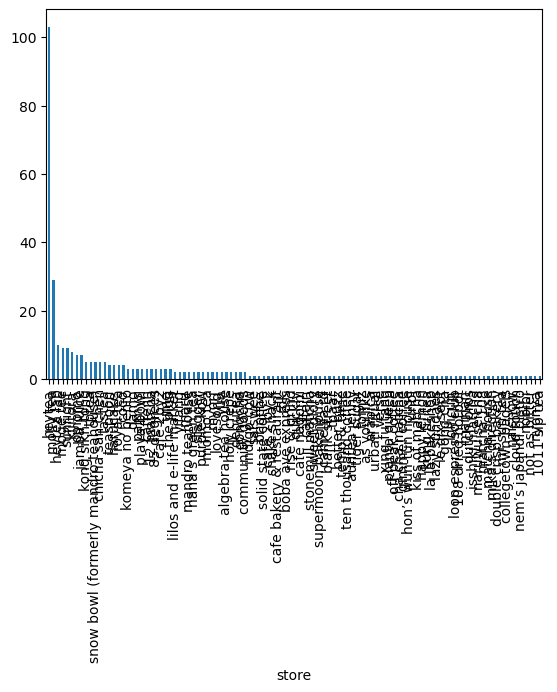

In [40]:
boba_clean.groupby('store').count()['drink'].sort_values(ascending=False).plot.bar();

In [41]:
num_stores = boba_clean.groupby('store').count()['drink'].shape[0]
print(f'I have been to {num_stores} different stores in 2025 (not counting different locations of the same chain!)')

I have been to 106 different stores in 2025 (not counting different locations of the same chain!)


top 30 stores

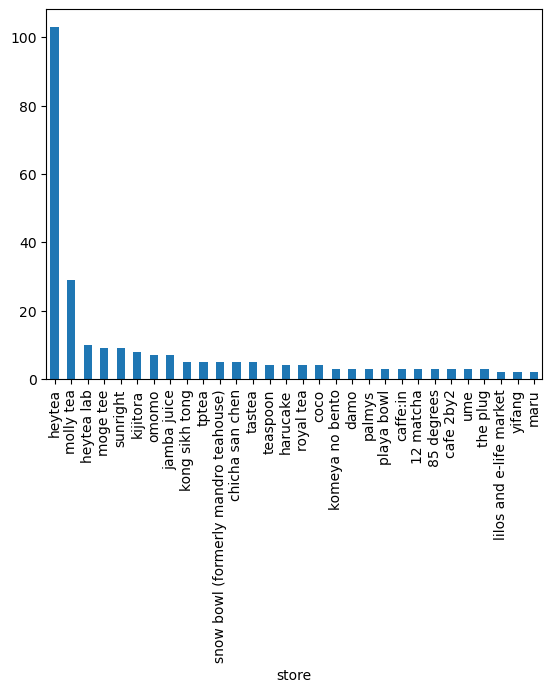

In [42]:
boba_clean.groupby('store').count()['drink'].sort_values(ascending=False)[:30].plot.bar();

### day of the week

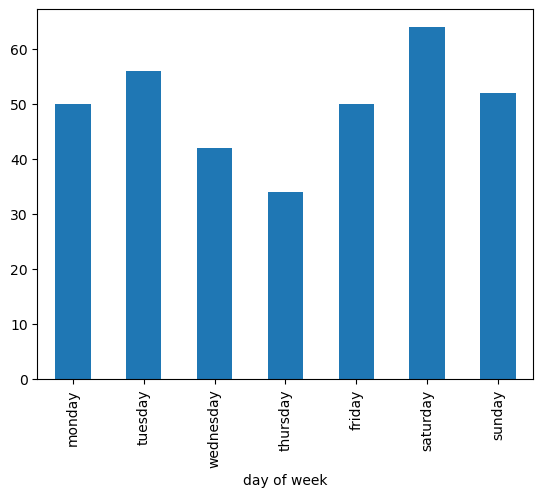

In [43]:
weekday_order = weekday_map.values()
boba_clean.groupby('day of week').count()['drink'].reindex(weekday_order).plot.bar();

In [44]:
week_frequencies = boba_clean.groupby('day of week').count().sort_values(
    by='drink', ascending=False)['drink']
popular_day = week_frequencies.index[0]
popular_day_count = week_frequencies[0]
print(f'I get boba most often on {popular_day}s, having gotten {popular_day_count} drinks on this day of the week in 2025.')

I get boba most often on saturdays, having gotten 64 drinks on this day of the week in 2025.


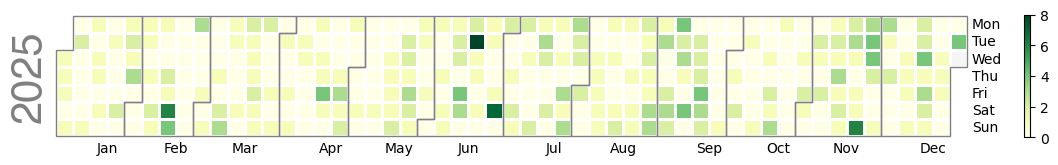

In [45]:
calplot.calplot(boba_clean.groupby('date_obj').count()['drink'], cmap='YlGn');

### unique drinks

In [46]:
boba_clean.groupby('drink')['day'].count().sort_values(ascending=False)

drink
mango coconut smoothie     43
jasmine milk tea           22
mango smoothie             21
matcha latte               18
milk tea                    9
                           ..
hojicha smoothie            1
hojicha milk tea            1
guava matcha latte          1
guava jasmine tea slush     1
yuzu matcha latte           1
Name: day, Length: 140, dtype: int64

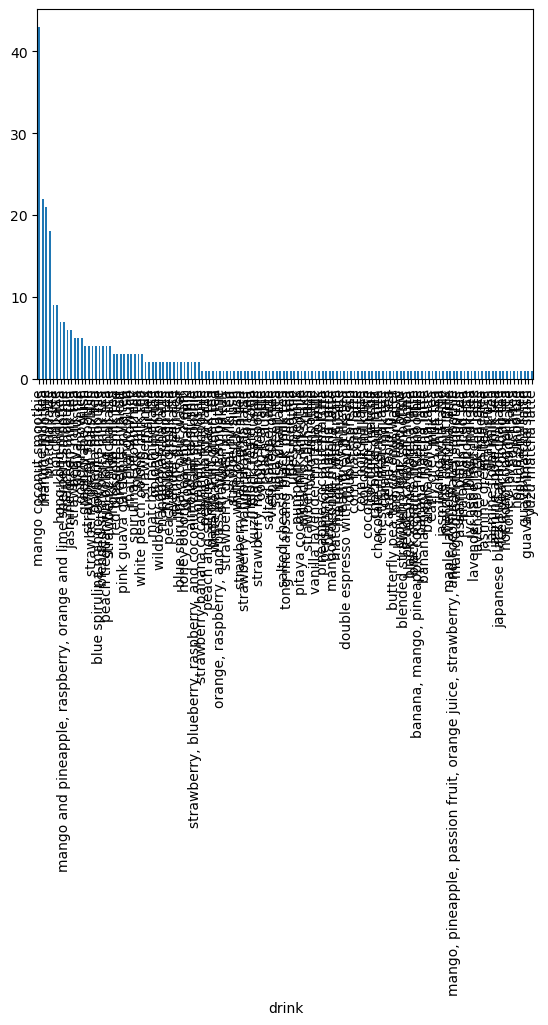

In [47]:
boba_clean.groupby('drink')['day'].count().sort_values(ascending=False).plot.bar();

top 10 unique drinks

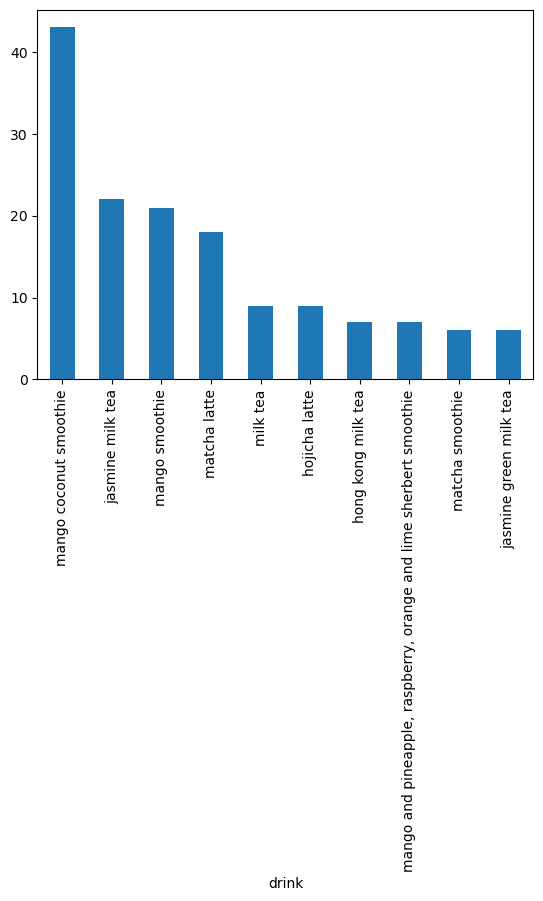

In [48]:
boba_clean.groupby('drink')['day'].count().sort_values(ascending=False)[:10].plot.bar();

### toppings

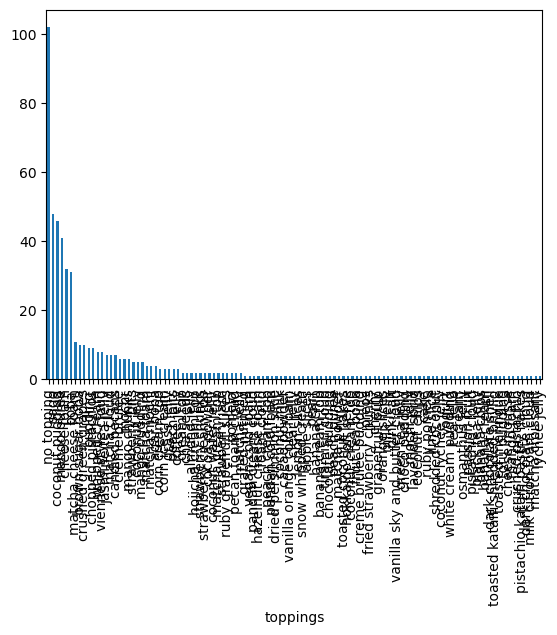

In [49]:
boba_clean['toppings'].dropna().explode().value_counts().plot.bar();

top 10 toppings

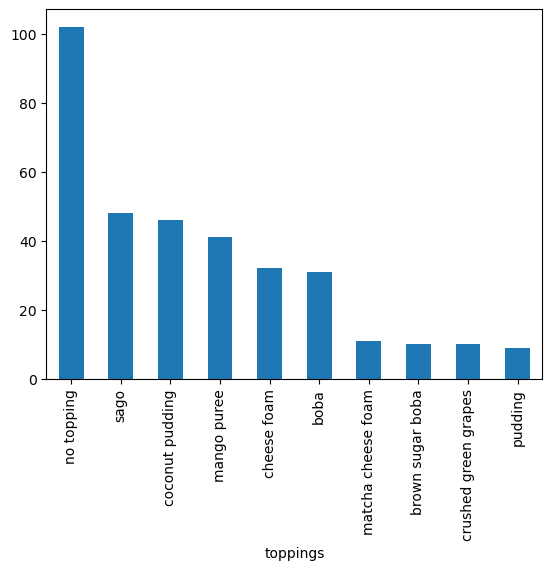

In [50]:
boba_clean['toppings'].dropna().explode().value_counts()[:10].plot.bar();

top 10 toppings + counts

In [51]:
boba_clean['toppings'].dropna().explode().value_counts()[:10]

toppings
no topping              102
sago                     48
coconut pudding          46
mango puree              41
cheese foam              32
boba                     31
matcha cheese foam       11
brown sugar boba         10
crushed green grapes     10
pudding                   9
Name: count, dtype: int64

toppings by group (when i get them together in a drink)

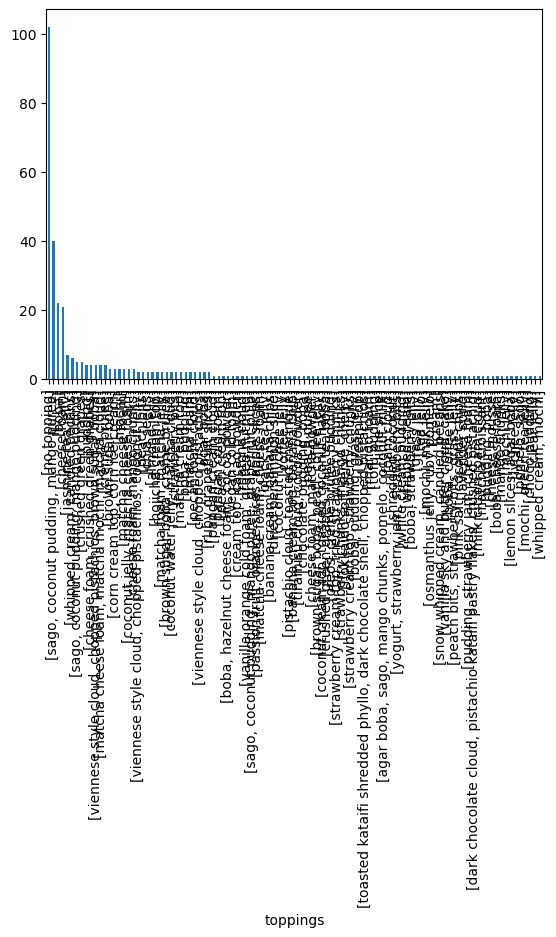

In [52]:
boba_clean['toppings'].dropna().value_counts().plot.bar();

top 10 toppings by group (when i get them together in a drink)

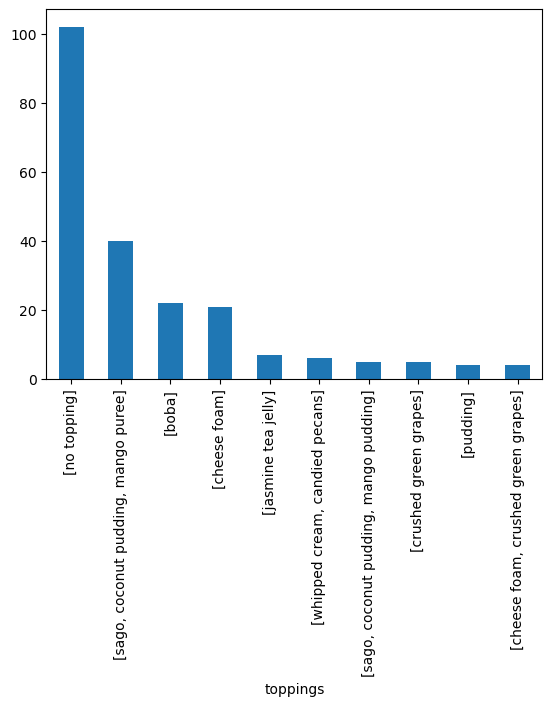

In [53]:
boba_clean['toppings'].dropna().value_counts()[:10].plot.bar();

### friends

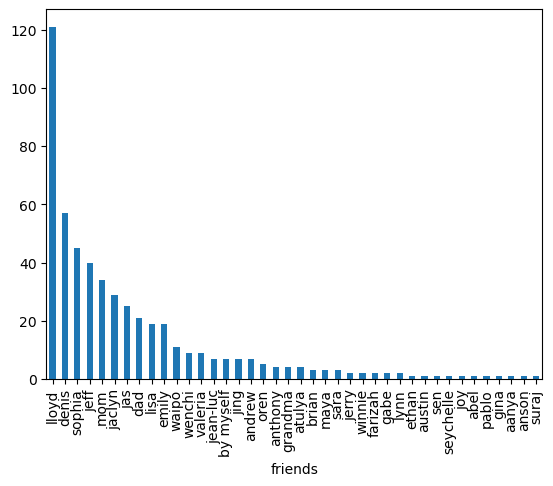

In [54]:
boba_clean['friends'].dropna().explode().value_counts().plot.bar();

top 20 friends + counts

In [55]:
boba_clean['friends'].dropna().explode().value_counts()[:20]

friends
lloyd        121
denis         57
sophia        45
jeff          40
mom           34
jaclyn        29
jas           25
dad           21
lisa          19
emily         19
waipo         11
wenchi         9
valeria        9
jean-luc       7
by myself      7
jing           7
andrew         7
oren           5
anthony        4
grandma        4
Name: count, dtype: int64

friends that went to get boba together as a group

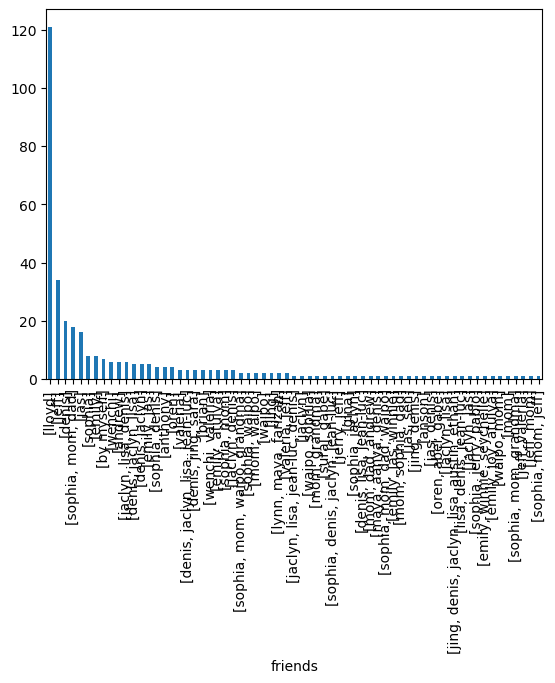

In [56]:
boba_clean['friends'].dropna().value_counts().plot.bar();

### cost

average cost

In [57]:
avg_cost = boba_clean['cost_dollars'].mean()
print(f'In 2025, I spent on average ${avg_cost:.2f} per drink.')

In 2025, I spent on average $7.31 per drink.


total cost

In [58]:
total_cost = boba_clean['cost_dollars'].sum()
print(f'In 2025, I spent ${total_cost:.2f} total on boba, pre-tax.')

In 2025, I spent $2544.68 total on boba, pre-tax.


average cost per location

In [59]:
boba_clean[['store', 'cost_dollars']].groupby('store').mean() \
[['cost_dollars']].sort_values(by='cost_dollars', ascending=False)

,cost_dollars
store,
isshiki matcha,11.500000
palmys,10.666667
playa bowl,10.283333
nem’s japandi bistro,10.000000
shake shack,9.990000
...,...
hon’s wun-tun house,4.950000
quickly,4.750000
cafe bakery & restaurant,4.750000


average cost per location of places i frequent (> 5 visits)

In [60]:
over5_visits = boba_clean[['store', 'drink']].groupby('store').count()['drink'] > 5
# boba[['store', 'drink']].groupby('store').count().where(over5_visits).dropna()
boba_clean[['store', 'cost_dollars']].groupby('store').mean().where(over5_visits) \
.dropna()[['cost_dollars']].sort_values(by='cost_dollars', ascending=False)

,cost_dollars
store,
jamba juice,9.698571
heytea lab,8.460000
moge tee,7.394444
heytea,7.341845
kijitora,7.125000
omomo,7.050000
molly tea,7.000345
sunright,6.988889


### size

average size

In [61]:
avg_size = boba_clean['size_oz'].mean()
print(f'In 2025, my average drink was {avg_size:.2f}oz.')

In 2025, my average drink was 17.82oz.


total ounces i drank

In [62]:
total_size = boba_clean['size_oz'].sum()
print(f'In 2025, I drank {total_size:.2f}oz of boba.')

In 2025, I drank 6202.00oz of boba.


average size per location

In [63]:
boba_clean[['store', 'size_oz']].groupby('store').mean()[['size_oz']] \
.sort_values(by='size_oz', ascending=False)

,size_oz
store,
tastea,32.000000
dutch bros,32.000000
boba ave express,32.000000
jamba juice,27.142857
caffe:in,26.000000
...,...
solid state coffee,12.000000
lovesong,12.000000
planta queen,8.000000


average size per location of places i frequent (> 5 visits)

In [64]:
over5_visits = boba_clean[['store', 'drink']].groupby('store').count()['drink'] > 5
# boba[['store', 'drink']].groupby('store').count().where(over5_visits).dropna()
boba_clean[['store', 'size_oz']].groupby('store').mean().where(over5_visits) \
.dropna()[['size_oz']].sort_values(by='size_oz', ascending=False)

,size_oz
store,
jamba juice,27.142857
sunright,24.000000
omomo,22.285714
moge tee,22.000000
heytea,16.757282
heytea lab,16.000000
kijitora,16.000000
molly tea,16.000000


### rating

average rating

In [65]:
avg_rating = boba_clean['rating_over_10'].mean()
print(f'In 2025, my average drink rating was {avg_rating:.2f}/10.')

In 2025, my average drink rating was 9.02/10.


counts of each rating

In [66]:
boba_clean.groupby('rating_over_10').count()[['drink']].rename(
    columns={'drink': 'count'})

,count
rating_over_10,
3.0,1
4.0,1
5.5,1
6.0,5
6.5,6
7.0,19
7.5,13
8.0,31
8.5,40


average rating per location

In [67]:
boba_clean[['store', 'rating_over_10']].groupby('store').mean()[['rating_over_10']] \
.sort_values(by='rating_over_10', ascending=False)

,rating_over_10
store,
dutch bros,10.00
better buzz,10.00
harucake,10.00
hon’s wun-tun house,10.00
jamba juice,10.00
...,...
108 dried hotpot,6.50
purple kow,6.25
double crisp bakery,6.00


average size per location of places i frequent (> 5 visits)

In [68]:
over5_visits = boba_clean[['store', 'drink']].groupby('store').count()['drink'] > 5
# boba[['store', 'drink']].groupby('store').count().where(over5_visits).dropna()
boba_clean[['store', 'rating_over_10']].groupby('store').mean().where(over5_visits) \
.dropna()[['rating_over_10']].sort_values(by='rating_over_10', ascending=False)

,rating_over_10
store,
jamba juice,10.000000
molly tea,9.844828
kijitora,9.812500
sunright,9.555556
heytea,9.373786
omomo,9.214286
moge tee,9.111111
heytea lab,9.000000


### combining cost, size, and rating

In [69]:
store_metrics_old = boba_clean[['store', 'cost_dollars', 'size_oz', 'rating_over_10']] \
.groupby('store').mean()[['cost_dollars', 'size_oz', 'rating_over_10']].sort_values(
    by='rating_over_10', ascending=False)
store_metrics_old

,cost_dollars,size_oz,rating_over_10
store,,,
dutch bros,7.490000,32.000000,10.00
better buzz,6.990000,20.000000,10.00
harucake,9.000000,15.000000,10.00
hon’s wun-tun house,4.950000,12.000000,10.00
jamba juice,9.698571,27.142857,10.00
...,...,...,...
108 dried hotpot,5.250000,22.000000,6.50
purple kow,7.075000,24.000000,6.25
double crisp bakery,2.500000,12.000000,6.00


In [70]:
store_metrics_old['cost_per_oz'] = (
    store_metrics_old['cost_dollars'] / store_metrics_old['size_oz']
)
store_metrics_old

,cost_dollars,size_oz,rating_over_10,cost_per_oz
store,,,,
dutch bros,7.490000,32.000000,10.00,0.234063
better buzz,6.990000,20.000000,10.00,0.349500
harucake,9.000000,15.000000,10.00,0.600000
hon’s wun-tun house,4.950000,12.000000,10.00,0.412500
jamba juice,9.698571,27.142857,10.00,0.357316
...,...,...,...,...
108 dried hotpot,5.250000,22.000000,6.50,0.238636
purple kow,7.075000,24.000000,6.25,0.294792
double crisp bakery,2.500000,12.000000,6.00,0.208333


average cost per ounce of drink by location

In [71]:
boba_clean['cost_per_oz'] = boba_clean['cost_dollars'] / boba_clean['size_oz']

In [72]:
(
    boba_clean[['store', 'cost_dollars', 'size_oz', 'rating_over_10', 'cost_per_oz']] 
    .groupby('store').mean()[['cost_dollars', 'size_oz', 'rating_over_10', 'cost_per_oz']] 
    .sort_values(
    by='rating_over_10', ascending=False)
)

,cost_dollars,size_oz,rating_over_10,cost_per_oz
store,,,,
dutch bros,7.490000,32.000000,10.00,0.234063
better buzz,6.990000,20.000000,10.00,0.349500
harucake,9.000000,15.000000,10.00,0.604167
hon’s wun-tun house,4.950000,12.000000,10.00,0.412500
jamba juice,9.698571,27.142857,10.00,0.359388
...,...,...,...,...
108 dried hotpot,5.250000,22.000000,6.50,0.238636
purple kow,7.075000,24.000000,6.25,0.294792
double crisp bakery,2.500000,12.000000,6.00,0.208333


In [73]:
store_metrics = (
    boba_clean[['store', 'cost_dollars', 'size_oz', 'rating_over_10', 'cost_per_oz']] 
    .groupby('store').mean()[['cost_dollars', 'size_oz', 'rating_over_10', 'cost_per_oz']] 
    .sort_values(
    by='cost_per_oz', ascending=False)
)
store_metrics

,cost_dollars,size_oz,rating_over_10,cost_per_oz
store,,,,
maru,5.750000,6.0,8.500000,1.078125
isshiki matcha,11.500000,12.0,7.500000,0.958333
palmys,10.666667,12.0,9.833333,0.888889
planta queen,7.000000,8.0,10.000000,0.875000
nem’s japandi bistro,10.000000,12.0,6.000000,0.833333
...,...,...,...,...
dutch bros,7.490000,32.0,10.000000,0.234063
snow bowl (formerly mandro teahouse),5.100000,22.0,8.500000,0.231818
double crisp bakery,2.500000,12.0,6.000000,0.208333


In [74]:
store_metrics.where(over5_visits).dropna().sort_values(by='rating_over_10', 
                                                       ascending=False)

,cost_dollars,size_oz,rating_over_10,cost_per_oz
store,,,,
jamba juice,9.698571,27.142857,10.000000,0.359388
molly tea,7.000345,16.000000,9.844828,0.437522
kijitora,7.125000,16.000000,9.812500,0.445312
sunright,6.988889,24.000000,9.555556,0.291204
heytea,7.341845,16.757282,9.373786,0.441759
omomo,7.050000,22.285714,9.214286,0.316694
moge tee,7.394444,22.000000,9.111111,0.336111
heytea lab,8.460000,16.000000,9.000000,0.528750
